In [1]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np



In [3]:
# Set the seed for the random number generator to 42.
# This ensures that the "random" numbers generated are the same every time the code is run, making the results reproducible.
np.random.seed(42)


## ---------------------------
## 1. DEFINE PARAMETERS & GENERATE DATA
## ---------------------------

# Define the true coefficient (weight) for the first independent variable (X1).
a1 = 0.30
# Define the true coefficient (weight) for the second independent variable (X2).
a2 = 0.60


# Generate 500 random values for the variable x1.
# These values are sampled from a uniform distribution between -5 and 5.
x1 = np.random.uniform(-5, 5, 500)

# Generate 500 random values for the variable x2.
# These values are sampled from a normal (Gaussian) distribution with a mean of -1 and a standard deviation of 1.
x2 = np.random.normal(-1, 1, 500)

# Generate 500 random error terms. This simulates the noise or randomness found in real-world data.
# The errors are sampled from a normal distribution with a mean of -0.5 and a standard deviation of 0.5.
e = np.random.normal(-0.5, 0.5, 500)


## ---------------------------
## 2. CONSTRUCT THE DATASET
## ---------------------------

# Create the data matrix (X) that will hold the independent variables (x1 and x2).
# It's initialized as a 500x2 array filled with zeros.
data = np.zeros((500, 2))

# Assign all 500 values from the x1 array to the first column (index 0) of the data matrix.
data[:, 0] = x1

# Assign all 500 values from the x2 array to the second column (index 1) of the data matrix.
data[:, 1] = x2


# Generate the observed dependent variable (y) based on the linear equation: y = a1*x1 + a2*x2 + error.
# First, create a vector of 500 zeros to store the y values.
y = np.zeros(500)

# Loop 500 times to calculate the y value for each corresponding x1, x2, and error term.
for i in range(500):
    y[i] = a1 * x1[i] + a2 * x2[i] + e[i]


## ---------------------------
## 3. SPLIT DATA INTO TRAINING AND TEST SETS
## ---------------------------

# The comments below describe the plan for the data:
# A decision rule could be applied to 'y' to turn this into a classification problem (e.g., if y >= 0, it's class 1).
# The first 400 samples will be used for training a model, and the remaining 100 for testing it.


# Create the training data matrix 'X' by slicing the first 400 rows from the 'data' matrix.
X = data[:400, :]

# Create the training target vector 'Y' by slicing the first 400 values from the 'y' vector.
Y = y[:400]

# Print the shape of the training data matrix 'X' to verify its dimensions.
print("Shape of the independent variable matrix:", X.shape)

# Print the shape of the training target vector 'Y' to verify its dimensions.
print("Shape of the dependent variable vector:", Y.shape)

Shape of the independent variable matrix: (400, 2)
Shape of the dependent variable vector: (400,)


In [5]:
## ---------------------------
## 1. ESTIMATE THE COEFFICIENTS
## ---------------------------

# This single line calculates the optimal coefficients using the Normal Equation formula: C = (X^T * X)^-1 * X^T * Y
# Breaking it down from the inside out:
# 1. np.transpose(X): Calculates the transpose of the feature matrix X.
# 2. np.matmul(np.transpose(X), X): Multiplies the transposed matrix by the original matrix (X^T * X).
# 3. np.linalg.inv(...): Calculates the inverse of the resulting matrix ((X^T * X)^-1).
# 4. np.matmul(np.transpose(X), Y): Multiplies the transposed matrix by the target vector Y (X^T * Y).
# 5. np.matmul(..., ...): Multiplies the results of step 3 and 4 to get the final coefficient vector C.
C = np.matmul(np.linalg.inv(np.matmul(np.transpose(X), X)), np.matmul(np.transpose(X), Y))

# Print the shape of the resulting coefficient vector C. It should be (2,) for two coefficients.
print(C.shape)
print("\n--- Model Estimation Results ---")

# Print the estimated coefficients, formatted to three decimal places.
# C[0] is the estimated 'a1' and C[1] is the estimated 'a2'.
print("The estimated values are:  a1={:.3f} and a2={:.3f}".format(C[0], C[1]))

# Print the actual, true coefficients that were used to generate the data for comparison.
print("The actual values are:    a1={:.2f} and a2={:.2f}".format(a1, a2))


(2,)

--- Model Estimation Results ---
The estimated values are:  a1=0.303 and a2=0.829
The actual values are:    a1=0.30 and a2=0.60


In [6]:

## ---------------------------
## 2. TEST THE MODEL ON A SINGLE SAMPLE
## ---------------------------

print("\n--- Model Testing on a Single Sample ---")

# Select a single test sample from the original data that was NOT used for training (index 410).
x1_test = x1[410]
x2_test = x2[410]

# Use the ESTIMATED coefficients (C[0], C[1]) to predict the value of y for the test sample.
# This is the model's prediction based on the learned relationship.
y_test = C[0] * x1_test + C[1] * x2_test

# Print the actual observed value (y[410], which includes random noise) and the model's predicted value (y_test).
# This shows how close the model's prediction is to the real-world outcome.
print(f"The observed and estimated values are {y[410] :.3f} and {y_test :.3f} respectively")


## ---------------------------
## 3. DEMONSTRATE CLASSIFICATION
## ---------------------------

# Use the predicted regression output ('y_test') to perform a simple binary classification.
# The threshold is set at 0 for this demonstration.
if y_test >= 0:
    # If the predicted value is positive or zero, classify it as Class 1.
    print("Classification result: Class 1")
else:
    # If the predicted value is negative, classify it as Class 2.
    print("Classification result: Class 2")


--- Model Testing on a Single Sample ---
The observed and estimated values are -1.206 and -1.409 respectively
Classification result: Class 2


(100,)


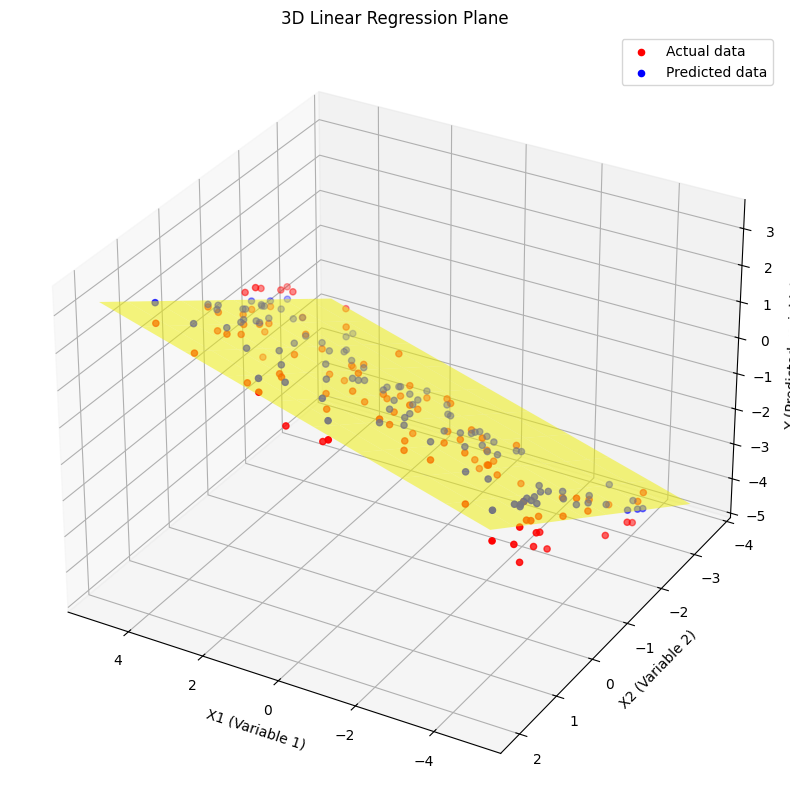

In [7]:
## ---------------------------
## 1. PREDICT VALUES FOR THE TEST SET
## ---------------------------

# Initialize a NumPy array of 100 zeros to store the predicted Y values for our 100 test samples.
Y_pred_test = np.zeros(100)

# Extract the feature 'x1' for the test set (rows 400 to 499) from the main data matrix.
X1_test = data[400:500, 0]

# Extract the feature 'x2' for the test set from the main data matrix.
x2_test = data[400:500, 1]

# Print the shape of the X1_test array to confirm it has 100 samples.
print(X1_test.shape)

# Loop through each of the 100 test samples to make a prediction.
for i in range(100):
    # Calculate the predicted Y value using the linear regression formula and the learned coefficients (C[0], C[1]).
    Y_pred_test[i] = C[0] * X1_test[i] + C[1] * x2_test[i]


## ---------------------------
## 2. SETUP AND PLOT THE 3D VISUALIZATION
## ---------------------------

# Create a new Matplotlib figure with a specified size of 10x10 inches.
fig = plt.figure(figsize=(10, 10))

# Add a 3D subplot to the figure. '111' means a 1x1 grid, 1st subplot. 'projection='3d'' is crucial.
ax = fig.add_subplot(111, projection='3d')


# --- Plot the Data Points ---

# Create a 3D scatter plot of the ACTUAL test data points.
# X-axis: x1 values, Y-axis: x2 values, Z-axis: actual observed y values.
# These points are colored red and will appear scattered around the regression plane due to random noise.
ax.scatter(data[400:500, 0], data[400:500, 1], y[400:500], marker='o', color='red', label='Actual data')

# Create a 3D scatter plot of the PREDICTED test data points.
# X and Y axes are the same, but the Z-axis uses the model's predictions (Y_pred_test).
# These points are colored blue and will lie perfectly on the regression plane.
ax.scatter(data[400:500, 0], data[400:500, 1], Y_pred_test, marker='o', color='blue', label='Predicted data')


# --- Create and Plot the Regression Plane ---

# To draw a surface, we need to create a grid of (x, y) points that spans the data range.
# np.linspace creates evenly spaced points. We do this for both the x1 and x2 axes.
# np.meshgrid then takes these 1D arrays and creates two 2D matrices representing the grid coordinates.
x_, y_ = np.meshgrid(np.linspace(data[:, 0].min(), data[:, 0].max(), 10),
                      np.linspace(data[:, 1].min(), data[:, 1].max(), 10))

# Calculate the predicted 'z' value for every single point on the meshgrid using our model's coefficients.
# This defines the height of our regression plane at every (x, y) coordinate.
z_ = C[0] * x_ + C[1] * y_

# Plot the 3D surface using the grid coordinates (x_, y_) and the calculated heights (z_).
# 'alpha=0.5' makes the plane semi-transparent, so we can see the data points behind it.
ax.plot_surface(x_, y_, z_, color='yellow', alpha=0.5)


# --- Finalize the Plot ---

# Set the labels for the three axes.
ax.set_xlabel("X1 (Variable 1)")
ax.set_ylabel("X2 (Variable 2)")
ax.set_zlabel("Y (Predicted variable)")

# Set the title for the entire plot.
ax.set_title("3D Linear Regression Plane")

# Display the legend to identify the 'Actual' and 'Predicted' data points.
ax.legend()

# Set the viewing angle of the 3D plot for better visualization.
# 'elev' is the elevation (up/down angle), 'azim' is the azimuth (side-to-side rotation).
ax.view_init(elev=30, azim=120)

# Display the final, rendered plot to the user.
plt.show()

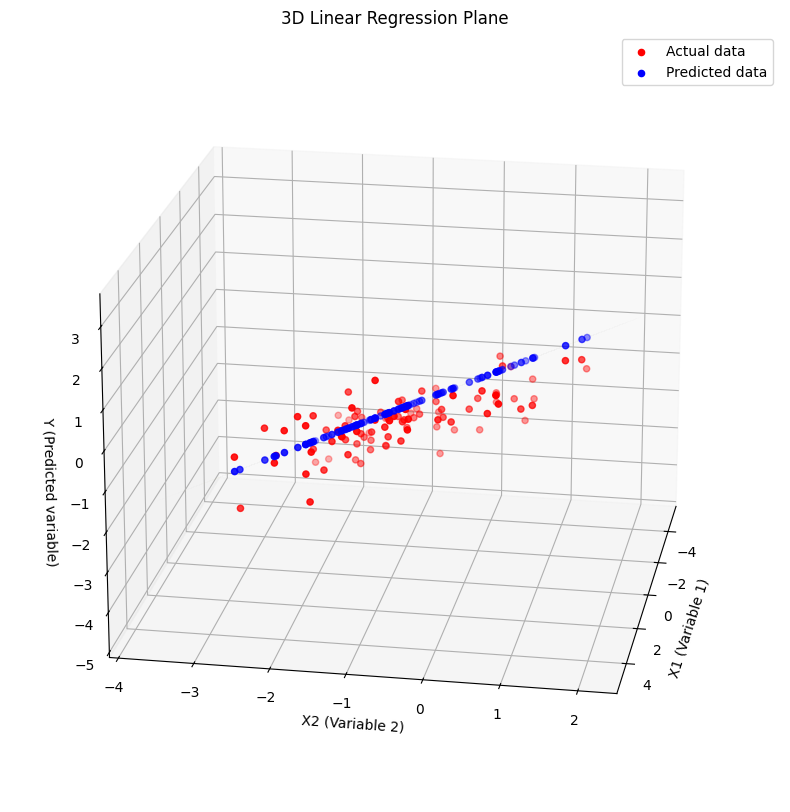

In [8]:
## ---------------------------
## SETUP AND PLOT THE 3D VISUALIZATION 📊
## ---------------------------

# Create a new Matplotlib figure with a specified size of 10x10 inches.
fig = plt.figure(figsize=(10, 10))

# Add a 3D subplot to the figure. '111' means a 1x1 grid, 1st subplot. 'projection='3d'' is crucial.
ax = fig.add_subplot(111, projection='3d')


# --- Plot the Data Points ---

# Create a 3D scatter plot of the ACTUAL test data points.
# X-axis: x1 values, Y-axis: x2 values, Z-axis: actual observed y values.
# These points are colored red and will appear scattered around the regression plane due to random noise.
ax.scatter(data[400:500, 0], data[400:500, 1], y[400:500], marker='o', color='red', label='Actual data')

# Create a 3D scatter plot of the PREDICTED test data points.
# X and Y axes are the same, but the Z-axis uses the model's predictions (Y_pred_test).
# These points are colored blue and will lie perfectly on the regression plane.
ax.scatter(data[400:500, 0], data[400:500, 1], Y_pred_test, marker='o', color='blue', label='Predicted data')


# --- Create and Plot the Regression Plane ---

# To draw a surface, we need to create a grid of (x, y) points that spans the data range.
# np.linspace creates evenly spaced points. We do this for both the x1 and x2 axes.
# np.meshgrid then takes these 1D arrays and creates two 2D matrices representing the grid coordinates.
x_, y_ = np.meshgrid(np.linspace(data[:, 0].min(), data[:, 0].max(), 10),
                      np.linspace(data[:, 1].min(), data[:, 1].max(), 10))

# Calculate the predicted 'z' value for every single point on the meshgrid using our model's coefficients.
# This defines the height of our regression plane at every (x, y) coordinate.
z_ = C[0] * x_ + C[1] * y_

# Plot the 3D surface using the grid coordinates (x_, y_) and the calculated heights (z_).
# 'alpha=0.5' makes the plane semi-transparent, so we can see the data points behind it.
ax.plot_surface(x_, y_, z_, color='yellow', alpha=0.5)


# --- Finalize the Plot ---

# Set the labels for the three axes.
ax.set_xlabel("X1 (Variable 1)")
ax.set_ylabel("X2 (Variable 2)")
ax.set_zlabel("Y (Predicted variable)")

# Set the title for the entire plot.
ax.set_title("3D Linear Regression Plane")

# Display the legend to identify the 'Actual' and 'Predicted' data points.
ax.legend()

# Set the viewing angle of the 3D plot for better visualization.
# 'elev' is the elevation (up/down angle), 'azim' is the azimuth (side-to-side rotation).
ax.view_init(elev=20, azim=10)

# Display the final, rendered plot to the user.
plt.show()